用带有三种类型噪声(度，边权重，点权重)的传销模型网络测试RoleMagnet的抗噪性

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Creating a graph
模拟23人的小型传销组织，带少量噪声

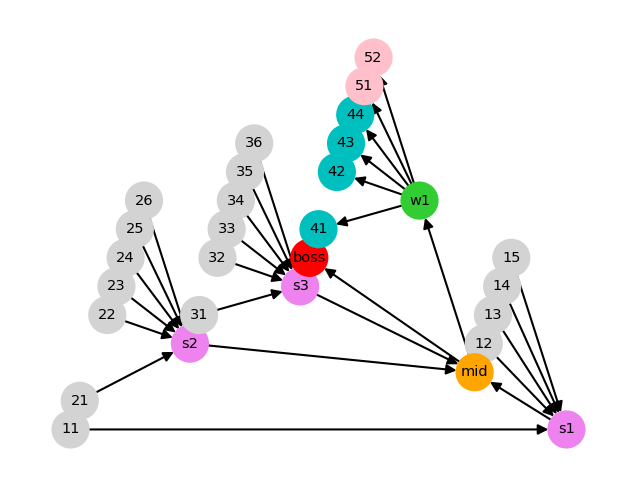

In [11]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4, 3)

G = nx.DiGraph()
G.add_weighted_edges_from([('11','s1',0.07),('12','s1',0.1),('13','s1',0.06),('14','s1',0.09),('15','s1',0.08),
                           ('21','s2',0.07),('22','s2',0.1),('23','s2',0.06),('24','s2',0.09),('25','s2',0.08),('26','s2',0.1),
                           ('31','s3',0.1),('32','s3',0.1),('33','s3',0.1),('34','s3',0.1),('35','s3',0.1),('36','s3',0.1),
                           ('s1','mid',0.4),('s2','mid',0.5),('s3','mid',0.55),
                           ('mid','boss',0.7),('mid','w1',0.72),
                           ('w1','41',0.065),('w1','42',0.05),('w1','43',0.06),('w1','44',0.055),('w1','51',0.24),('w1','52',0.25)])
# 净获利
balance=[-0.07,0,-0.1,-0.06,-0.09,-0.08,
         -0.07,0,-0.1,-0.06,-0.09,-0.08,-0.1,
         -0.1,0.05,-0.1,-0.1,-0.1,-0.1,-0.1,
         0.03,0.7,0,
         0.065,0.05,0.06,0.055,0.24,0.25]
color=['lightgray','violet','lightgray','lightgray','lightgray','lightgray',
       'lightgray','violet','lightgray','lightgray','lightgray','lightgray','lightgray',
       'lightgray','violet','lightgray','lightgray','lightgray','lightgray','lightgray',
       'orange','r','limegreen',
       'c','c','c','c','pink','pink']
nx.draw_planar(G, with_labels=True, node_color=color, node_size=300, font_size=7)
plt.show()

## RoleMagnet

In [12]:
import rolemagnet as rm
vec,role,label=rm.role_magnet(G, balance=balance)

Embedding: 100.00%  -
SOM shape: [11, 7]
Training SOM: 145


## Visualization
可视化节点的向量表示，用PCA降到二维后再次可视化

三维嵌入结果
11 	 [-4.656918    2.50780243 -2.60384377]
s1 	 [13.6955635  -7.36617524  0.        ]
12 	 [-3.4945784   1.04689359 -3.71977681]
13 	 [-4.72707781  3.05246777 -2.23186608]
14 	 [-3.95635282  1.50288243 -3.34779913]
15 	 [-4.37087035  1.9886804  -2.97582145]
21 	 [-4.5643264   3.33294681 -2.60384377]
s2 	 [ 17.36800426 -11.11766841   0.        ]
22 	 [-4.23934001  2.05242074 -3.71977681]
23 	 [-4.37037584  3.68885727 -2.23186608]
24 	 [-4.48608341  2.46724424 -3.34779913]
25 	 [-4.60589919  2.90127084 -2.97582145]
26 	 [-4.23934001  2.05242074 -3.71977681]
31 	 [-4.41890655  2.45218286 -3.71977681]
s3 	 [ 18.0140488  -11.44197277   1.8598884 ]
32 	 [-4.41890655  2.45218286 -3.71977681]
33 	 [-4.41890655  2.45218286 -3.71977681]
34 	 [-4.41890655  2.45218286 -3.71977681]
35 	 [-4.41890655  2.45218286 -3.71977681]
36 	 [-4.41890655  2.45218286 -3.71977681]
mid 	 [29.54709281  2.7854159   1.11593304]
boss 	 [-0.24243254 -5.20282019 26.03843765]
w1 	 [16.38327335 28.67939275  0.     

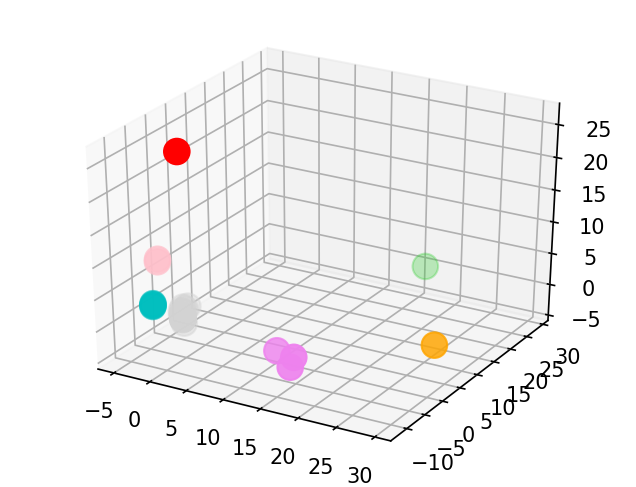

二维嵌入结果
11 	 [-0.66624534 -0.35717797]
s1 	 [1.06101999 1.05087871]
12 	 [-0.63057627 -0.30973199]
13 	 [-0.67443271 -0.3372424 ]
14 	 [-0.64173642 -0.33479466]
15 	 [-0.65428495 -0.35347292]
21 	 [-0.7390703  -0.30637346]
s2 	 [1.50793866 1.24395287]
22 	 [-0.74358681 -0.3366635 ]
23 	 [-0.72252641 -0.26850496]
24 	 [-0.74489885 -0.34150612]
25 	 [-0.74437527 -0.33224059]
26 	 [-0.74358681 -0.3366635 ]
31 	 [-0.78521878 -0.3352992 ]
s3 	 [1.7738592  1.29468204]
32 	 [-0.78521878 -0.3352992 ]
33 	 [-0.78521878 -0.3352992 ]
34 	 [-0.78521878 -0.3352992 ]
35 	 [-0.78521878 -0.3352992 ]
36 	 [-0.78521878 -0.3352992 ]
mid 	 [0.712147   3.20004334]
boss 	 [ 3.520691   -0.28497385]
w1 	 [-2.15865961  3.12963674]
41 	 [ 0.78021174 -0.6951747 ]
42 	 [ 0.69238191 -0.69946636]
43 	 [ 0.752886   -0.69585009]
44 	 [ 0.72371028 -0.69708262]
51 	 [ 1.50580311 -0.61132047]
52 	 [ 1.54464352 -0.60915833]


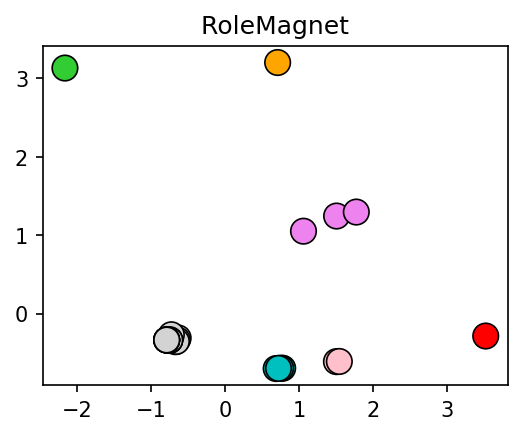

In [13]:
print ('三维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',vec[i])
    
from mpl_toolkits.mplot3d import Axes3D
coord = np.transpose(vec)
fig = plt.figure(figsize=(4,3))
ax = Axes3D(fig)
ax.scatter(coord[0], coord[1], coord[2], c=color, s=150)
plt.show()

# 再次降到二维
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

reduced=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(vec))
print ('二维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',reduced[i])

coord = np.transpose(reduced)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("RoleMagnet")
plt.show()

## Evaluation
用 Adjusted Rand Index 和 V-Measure 两种指标评价聚类结果

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_completeness_v_measure

true_label=[1,2,1,1,1,1,
            1,2,1,1,1,1,1,
            1,2,1,1,1,1,1,
            3,4,5,6,6,6,6,7,7]

print('Adjusted Rand Index:',adjusted_rand_score(true_label,label))
print('V-Measure:',homogeneity_completeness_v_measure(true_label,label))
print('\n聚类结果')
for k,v in role.items():
    print(k,v[0])
    for i in v[1]:
        print('   ',list(G.nodes)[i])

Adjusted Rand Index: 0.9892723141150981
V-Measure: (1.0, 0.9536171907216509, 0.9762579846765088)

聚类结果
21 [-0.6 -0.4]
    11
    12
    13
    14
    15
    21
    22
    24
    23
    25
    26
    31
    32
    33
    34
    35
    36
45 [1.2 1.2]
    s1
59 [1.6 1.2]
    s2
    s3
41 [0.6 3.2]
    mid
71 [ 3.6 -0.2]
    boss
6 [-2.2  3.2]
    w1
35 [ 0.8 -0.6]
    41
    43
    44
    42
49 [ 1.6 -0.6]
    51
    52
